In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

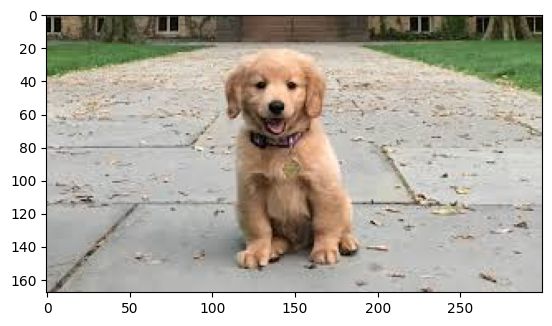

In [2]:
full = cv2.imread(r"opencv_2\media\dog.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

In [22]:
width, height, channels = full.shape # 3 değeri

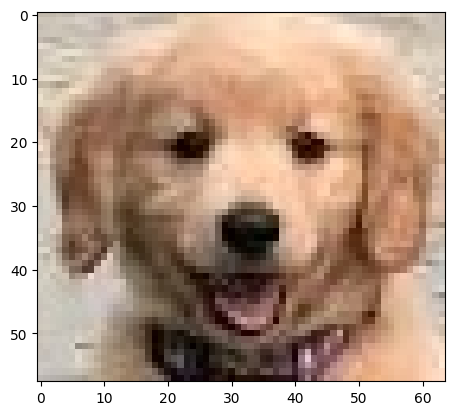

In [6]:
head = cv2.imread(r"opencv_2\media\dog_head.jpg")
head = cv2.cvtColor(head, cv2.COLOR_BGR2RGB)
plt.imshow(head)

In [7]:
head.shape

(58, 64, 3)

In [8]:
my_method = eval("cv2.TM_CCOEFF")
res = cv2.matchTemplate(full, head, my_method) # resimde head arıyoruz

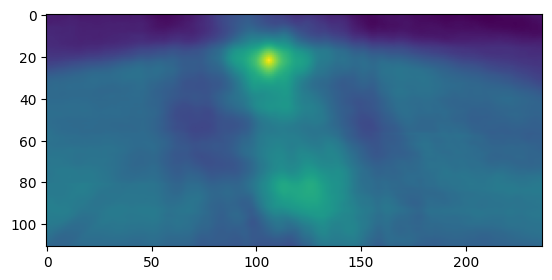

In [9]:
plt.imshow(res)

In [28]:
full = cv2.imread(r"opencv_2\media\dog2.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

head = cv2.imread(r"opencv_2\media\dog_head2.jpg")
head = cv2.cvtColor(head, cv2.COLOR_BGR2RGB)


methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

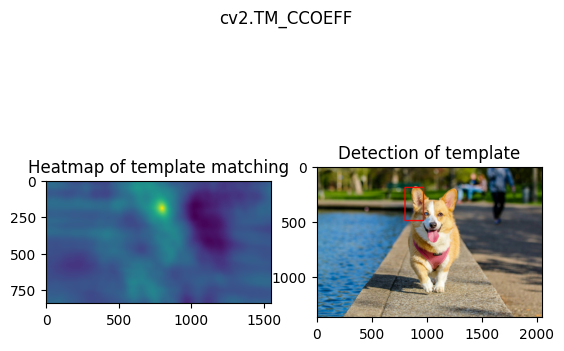

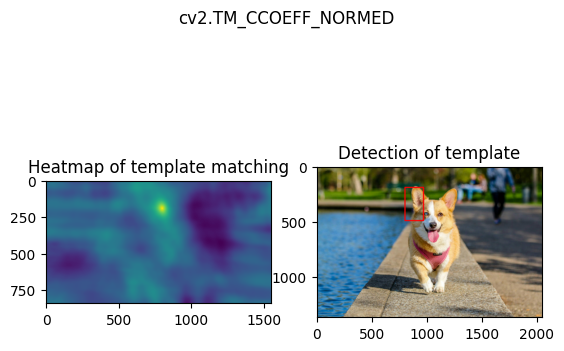

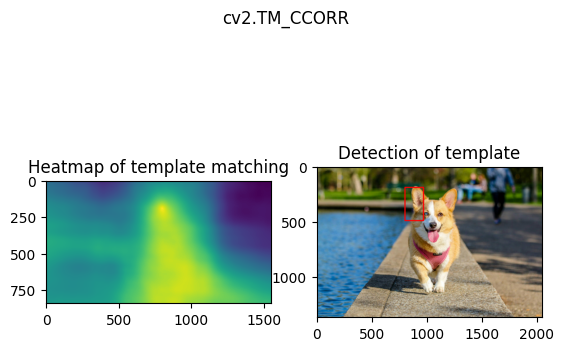

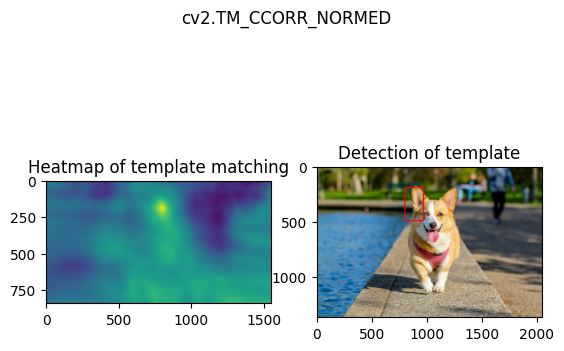

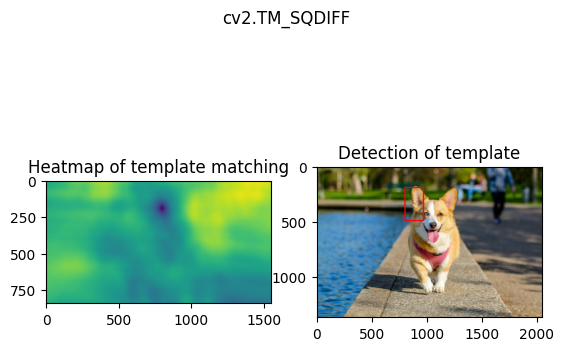

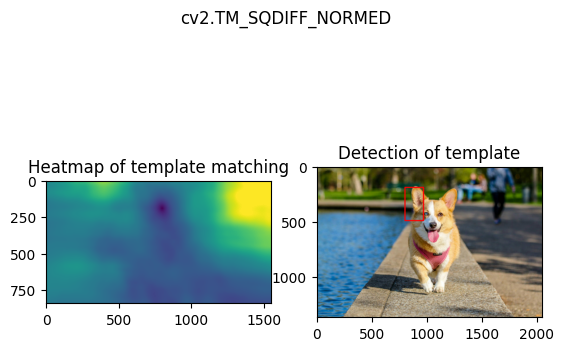

In [31]:
for m in methods:
    full_copy = full.copy()
    method = eval(m) # string ifadeyi python koduna çevirir
    res = cv2.matchTemplate(full_copy, head, method) # resimde head arıyoruz
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # en düşük ve en yüksek değerler ve konumlarını alırız
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: # en düşük değerlerde
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right =  (top_left[0] + width,top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    plt.subplot(121) #121 sol tarafta
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122) #122 sağ tarafta
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')